# Data exploration

This notebook contains some plots to visualize and explore data: current missing values, wind turbine layout, etc.

### Load data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("../data/data.csv")
data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


### Add datetime and normalized power columns

In [17]:
data["datetime"] = pd.to_datetime("2020-01-01") + pd.to_timedelta(data["Day"] - 1, unit="D") + pd.to_timedelta(data["Tmstamp"]+":00")
data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,datetime
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,2020-01-01 00:10:00
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,2020-01-01 00:20:00
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,2020-01-01 00:30:00
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,2020-01-01 00:40:00


In [18]:
data['P_norm'] = (data['Patv'] - data['Patv'].min()) / (data['Patv'].max() - data['Patv'].min())
data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,datetime,P_norm
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66,2020-01-01 00:10:00,0.319720
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76,2020-01-01 00:20:00,0.329299
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53,2020-01-01 00:30:00,0.350087
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36,2020-01-01 00:40:00,0.329045


### Initial data info

In [19]:
data.describe()

,TurbID,Day,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,datetime,P_norm
count,4.727520e+06,4.727520e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4.678002e+06,4727520,4.678002e+06
mean,6.750000e+01,1.230000e+02,5.028376e+00,4.975428e-01,4.110668e+01,2.739717e+01,1.885826e+02,2.685400e+01,2.683916e+01,2.682679e+01,-1.323900e+01,3.504458e+02,2020-05-02 11:55:00.000001536,2.282334e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-3.030460e+03,-2.730300e+02,-2.731700e+02,-8.848600e+02,-1.000000e+01,-1.000000e+01,-1.000000e+01,-6.249800e+02,-9.330000e+00,2020-01-01 00:00:00,0.000000e+00
25%,3.400000e+01,6.200000e+01,2.240000e+00,-3.830000e+00,1.405000e+01,2.006000e+01,6.302000e+01,1.000000e-02,1.000000e-02,1.000000e-02,-3.861000e+01,-3.000000e-01,2020-03-02 05:57:30,5.728423e-03
50%,6.750000e+01,1.230000e+02,4.340000e+00,-2.300000e-01,2.573000e+01,3.008000e+01,1.947900e+02,5.400000e-01,5.400000e-01,5.400000e-01,-3.000000e-01,1.790800e+02,2020-05-02 11:55:00,1.195229e-01
75%,1.010000e+02,1.840000e+02,7.010000e+00,3.420000e+00,3.273000e+01,3.682000e+01,3.219600e+02,8.399000e+01,8.398000e+01,8.398000e+01,-3.000000e-02,5.476600e+02,2020-07-02 17:52:30,3.533416e-01
max,1.340000e+02,2.450000e+02,2.629000e+01,2.266950e+03,3.943300e+02,3.242100e+02,7.006200e+02,9.998000e+01,9.998000e+01,9.998000e+01,4.852000e+02,1.567020e+03,2020-09-01 23:50:00,1.000000e+00
std,3.868139e+01,7.072483e+01,3.393703e+00,3.160275e+01,8.529011e+01,1.832832e+01,1.632459e+02,3.883566e+01,3.882940e+01,3.882235e+01,7.044244e+01,4.249932e+02,NaN,2.696059e-01


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727520 entries, 0 to 4727519
Data columns (total 15 columns):
 #   Column    Dtype         
---  ------    -----         
 0   TurbID    int64         
 1   Day       int64         
 2   Tmstamp   object        
 3   Wspd      float64       
 4   Wdir      float64       
 5   Etmp      float64       
 6   Itmp      float64       
 7   Ndir      float64       
 8   Pab1      float64       
 9   Pab2      float64       
 10  Pab3      float64       
 11  Prtv      float64       
 12  Patv      float64       
 13  datetime  datetime64[ns]
 14  P_norm    float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(1)
memory usage: 541.0+ MB


In [21]:
turbines = pd.read_csv("../data/turbines.csv")
turbines.head()

,TurbID,x,y
0,1,3349.8515,5939.23193
1,2,3351.0017,6416.64673
2,3,3314.7797,6892.18395
3,4,3352.0940,7366.14203
4,5,3355.3420,7841.20175


In [22]:
turbines.describe()

,TurbID,x,y
count,134.000000,134.000000,134.000000
mean,67.500000,2666.760881,5986.126609
std,38.826537,1829.842484,3346.503906
min,1.000000,0.000000,0.000000
25%,34.250000,1014.935725,3182.294825
50%,67.500000,3246.541850,5841.894340
75%,100.750000,4320.609625,8814.832950
max,134.000000,5501.452900,12121.004260


In [23]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TurbID  134 non-null    int64  
 1   x       134 non-null    float64
 2   y       134 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.3 KB


### Turbine spacial distribution

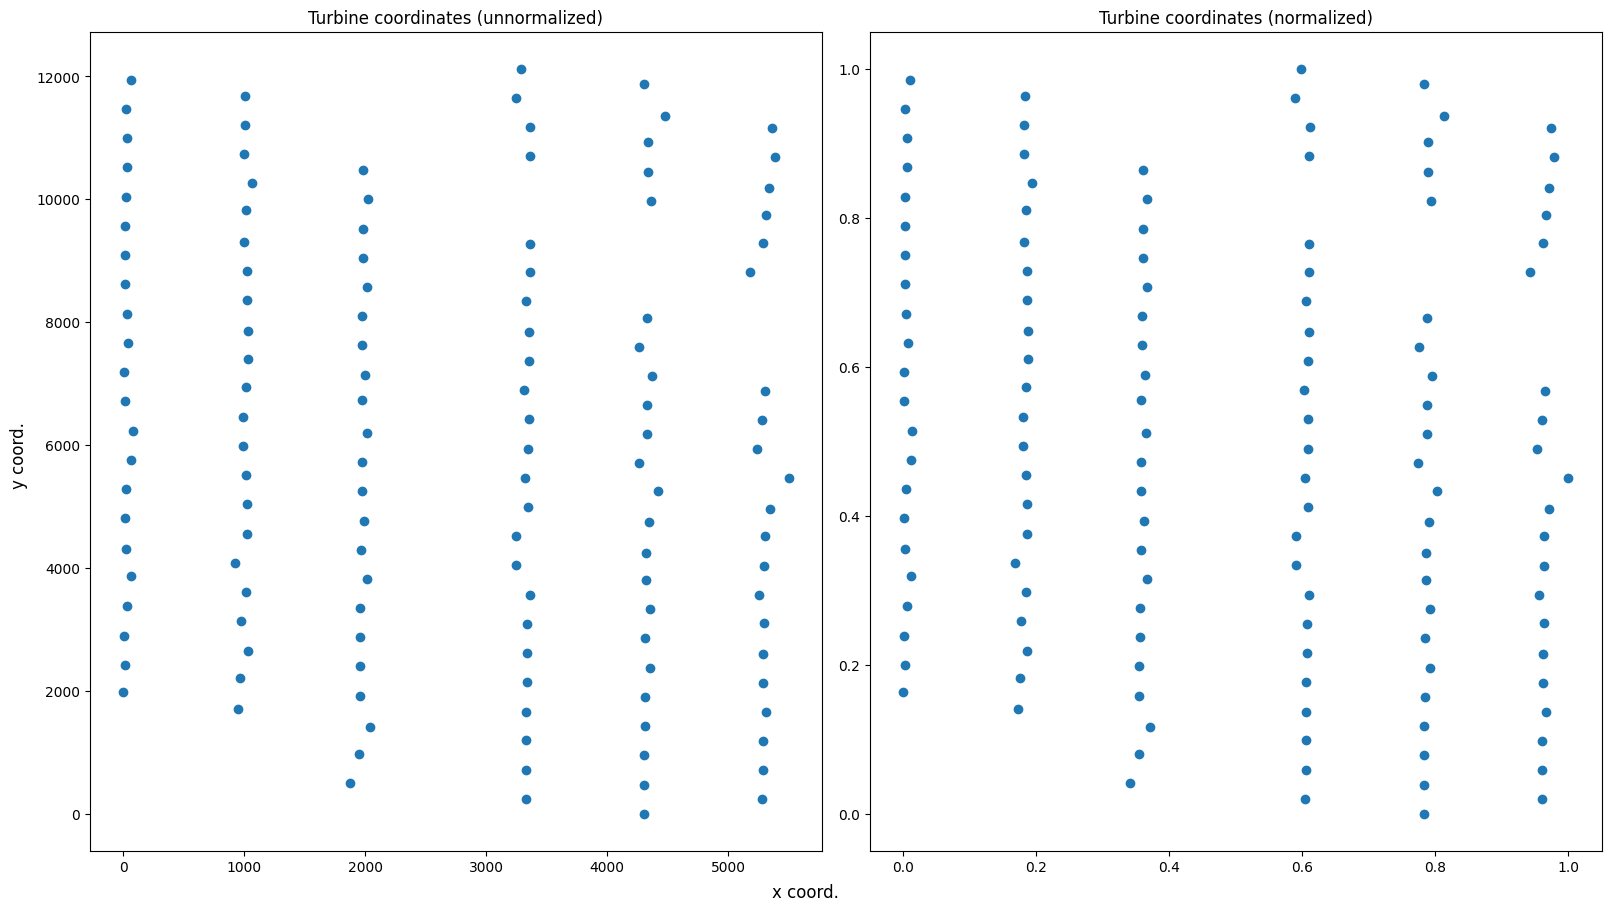

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16,9), constrained_layout=True)
x = turbines["x"]
y = turbines["y"]
axs[0].scatter(x, y)
axs[0].set_title("Turbine coordinates (unnormalized)")

x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
axs[1].scatter( (x - x_min) / (x_max - x_min), (y - y_min) / (y_max - y_min))
axs[1].set_title("Turbine coordinates (normalized)")

fig.supxlabel("x coord.")
fig.supylabel("y coord.")

plt.show()

### Power stats plots

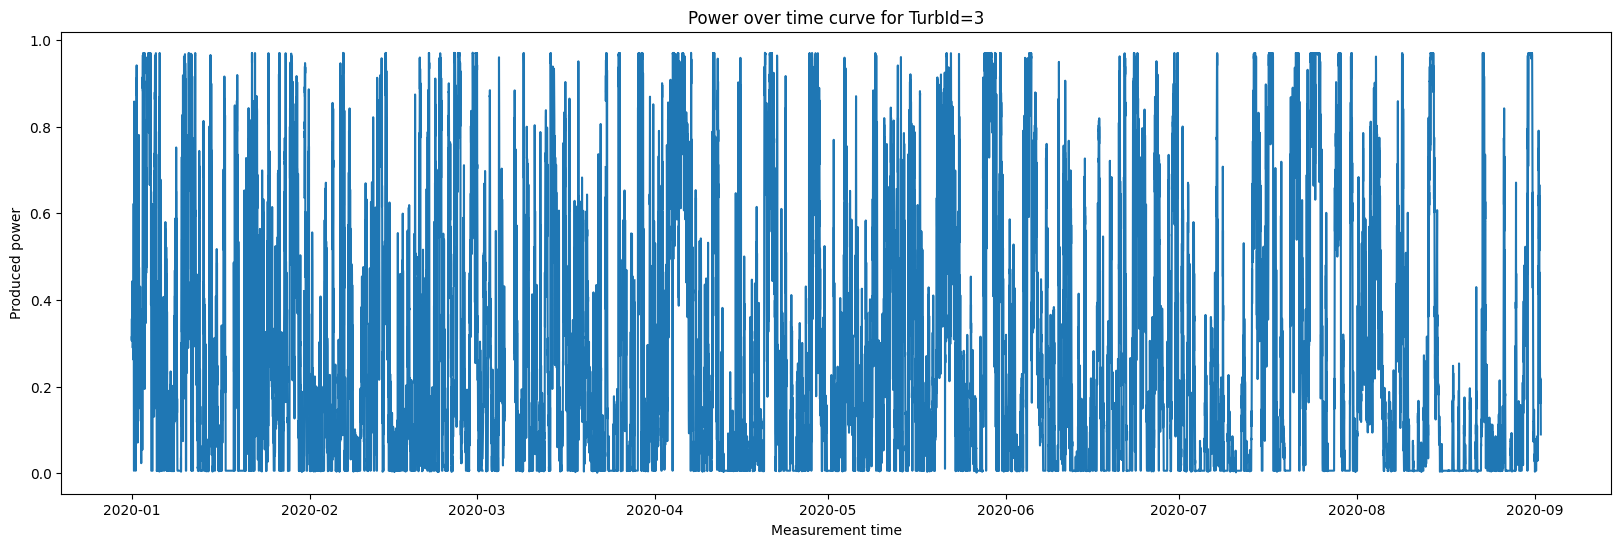

In [25]:
turb_id = 3

item = data[data["TurbID"] == turb_id]
x = item['datetime']
y = item["P_norm"]
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x, y)
ax.set_xlabel("Measurement time")
ax.set_ylabel("Produced power")
ax.set_title(f"Power over time curve for TurbId={turb_id}")
plt.show()

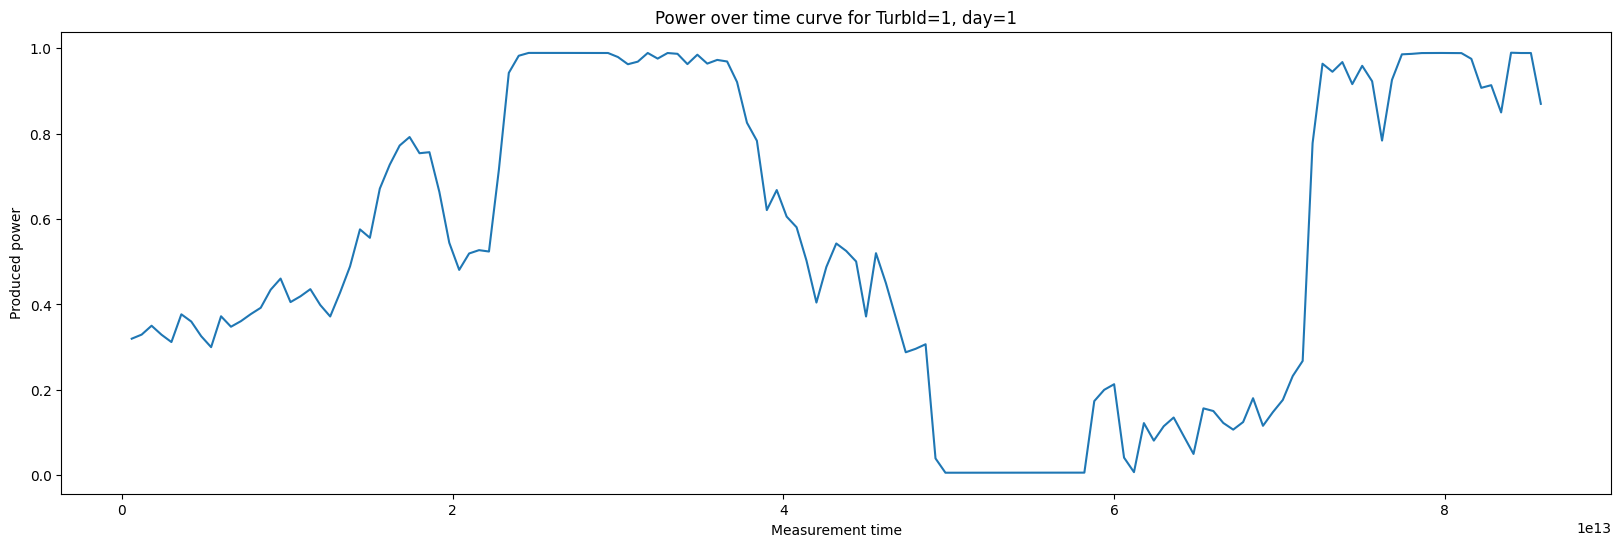

In [26]:
turb_id = 1
day = 1

item = data[(data["TurbID"] == turb_id) & (data['Day'] == day)]
x = pd.to_timedelta(item["Tmstamp"] + ":00")
y = item["P_norm"]
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(x, y)
ax.set_xlabel("Measurement time")
ax.set_ylabel("Produced power")
ax.set_title(f"Power over time curve for TurbId={turb_id}, day={day}")
plt.show()

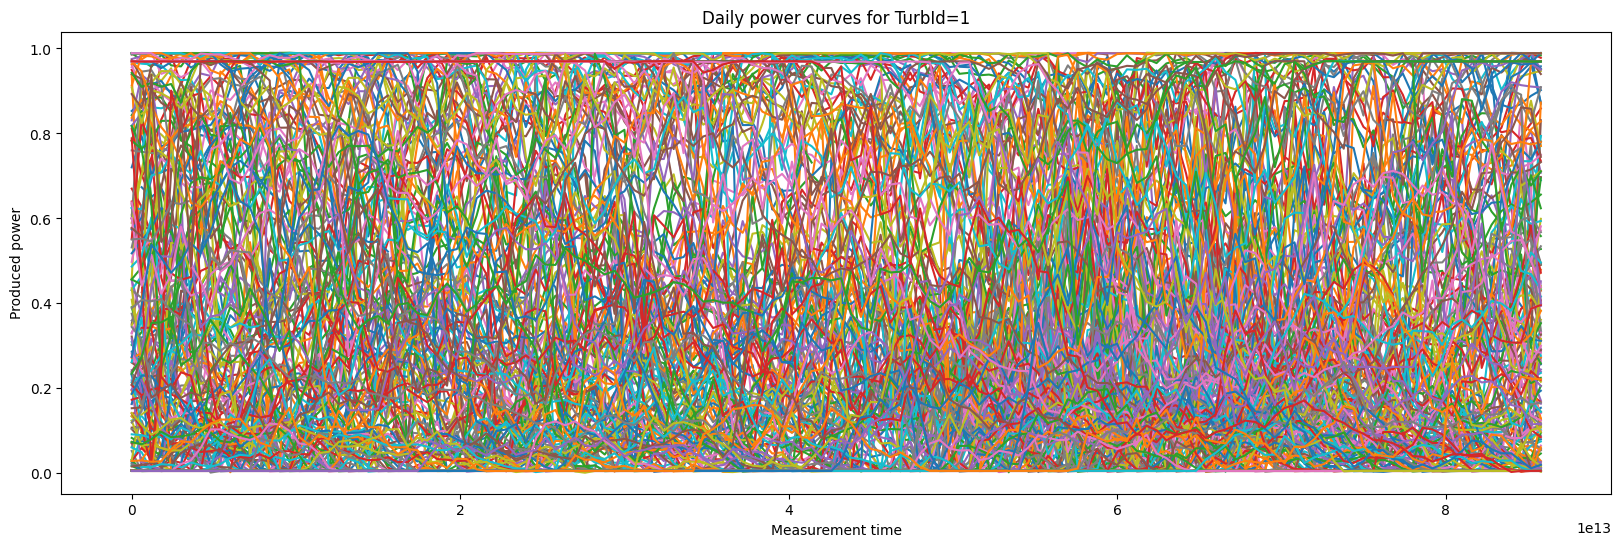

In [27]:
turb_id = 1

fig, ax = plt.subplots(figsize=(20,6))
for day in data[data['TurbID'] == turb_id]['Day'].unique():
    item = data[(data["TurbID"] == turb_id) & (data['Day'] == day)]
    x = pd.to_timedelta(item["Tmstamp"] + ":00")
    y = item["P_norm"]
    ax.plot(x, y)

ax.set_xlabel("Measurement time")
ax.set_ylabel("Produced power")
ax.set_title(f"Daily power curves for TurbId={turb_id}")
plt.show()

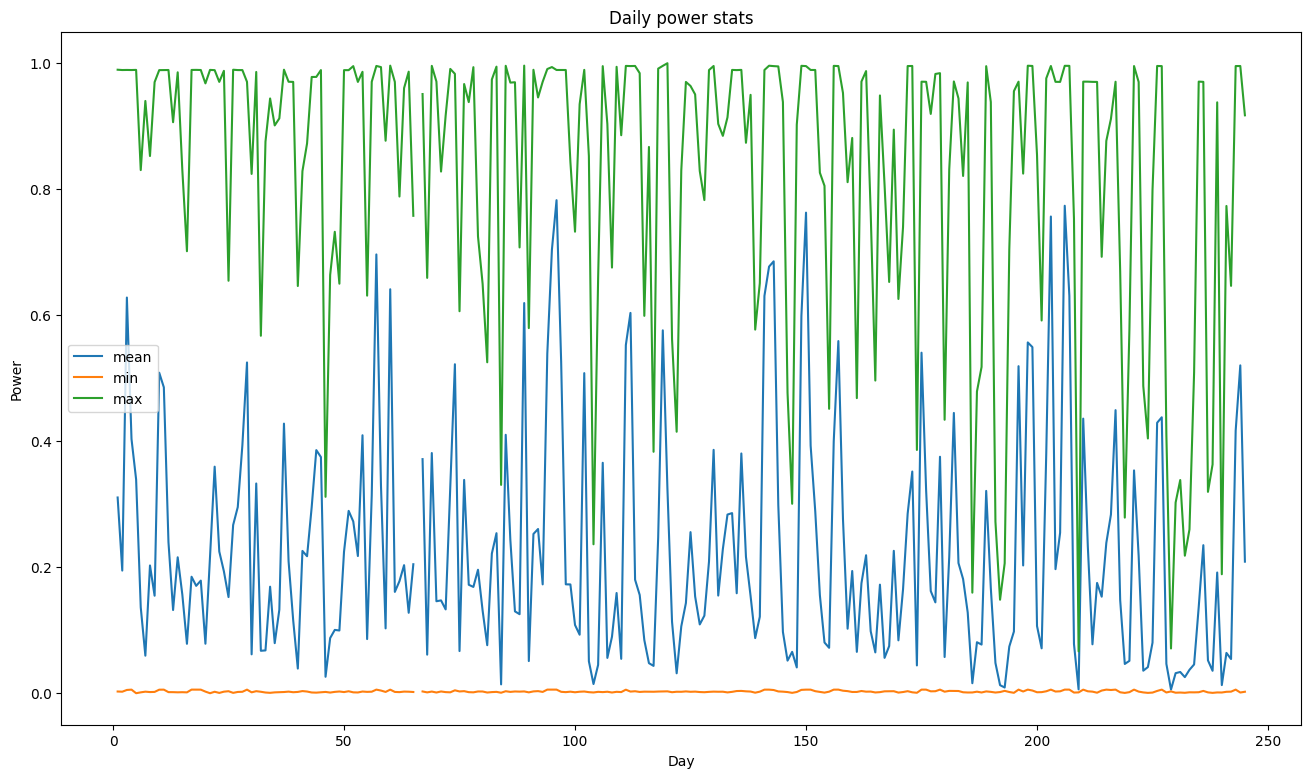

In [28]:
data_group_day = data.groupby(by='Day')
mean_dict = {day: df['P_norm'].mean() for day, df in data_group_day}
min_dict = {day: df['P_norm'].min() for day, df in data_group_day}
max_dict = {day: df['P_norm'].max() for day, df in data_group_day}

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(mean_dict.keys(), mean_dict.values(), label="mean")
ax.plot(min_dict.keys(), min_dict.values(), label="min")
ax.plot(max_dict.keys(), max_dict.values(), label="max")
ax.set_title("Daily power stats")
ax.set_xlabel("Day")
ax.set_ylabel("Power")
ax.legend()
plt.show()

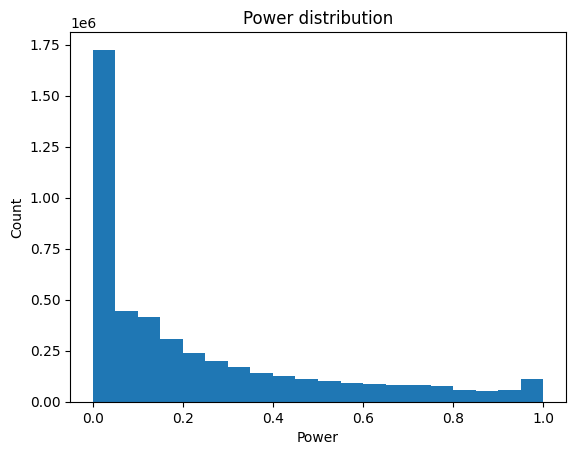

In [29]:
fig, ax = plt.subplots()
ax.hist(data['P_norm'], bins=20)
ax.set_title("Power distribution")
ax.set_xlabel("Power")
ax.set_ylabel("Count")
plt.show()

In [30]:
data[data['Patv'] == 0].size / data.size

0.024685670288015705

In [31]:
data['Patv'].isna().sum() / (data['Patv'].isna() - 1).abs().sum()

0.010585288334635172

### Turbine missing values analysis

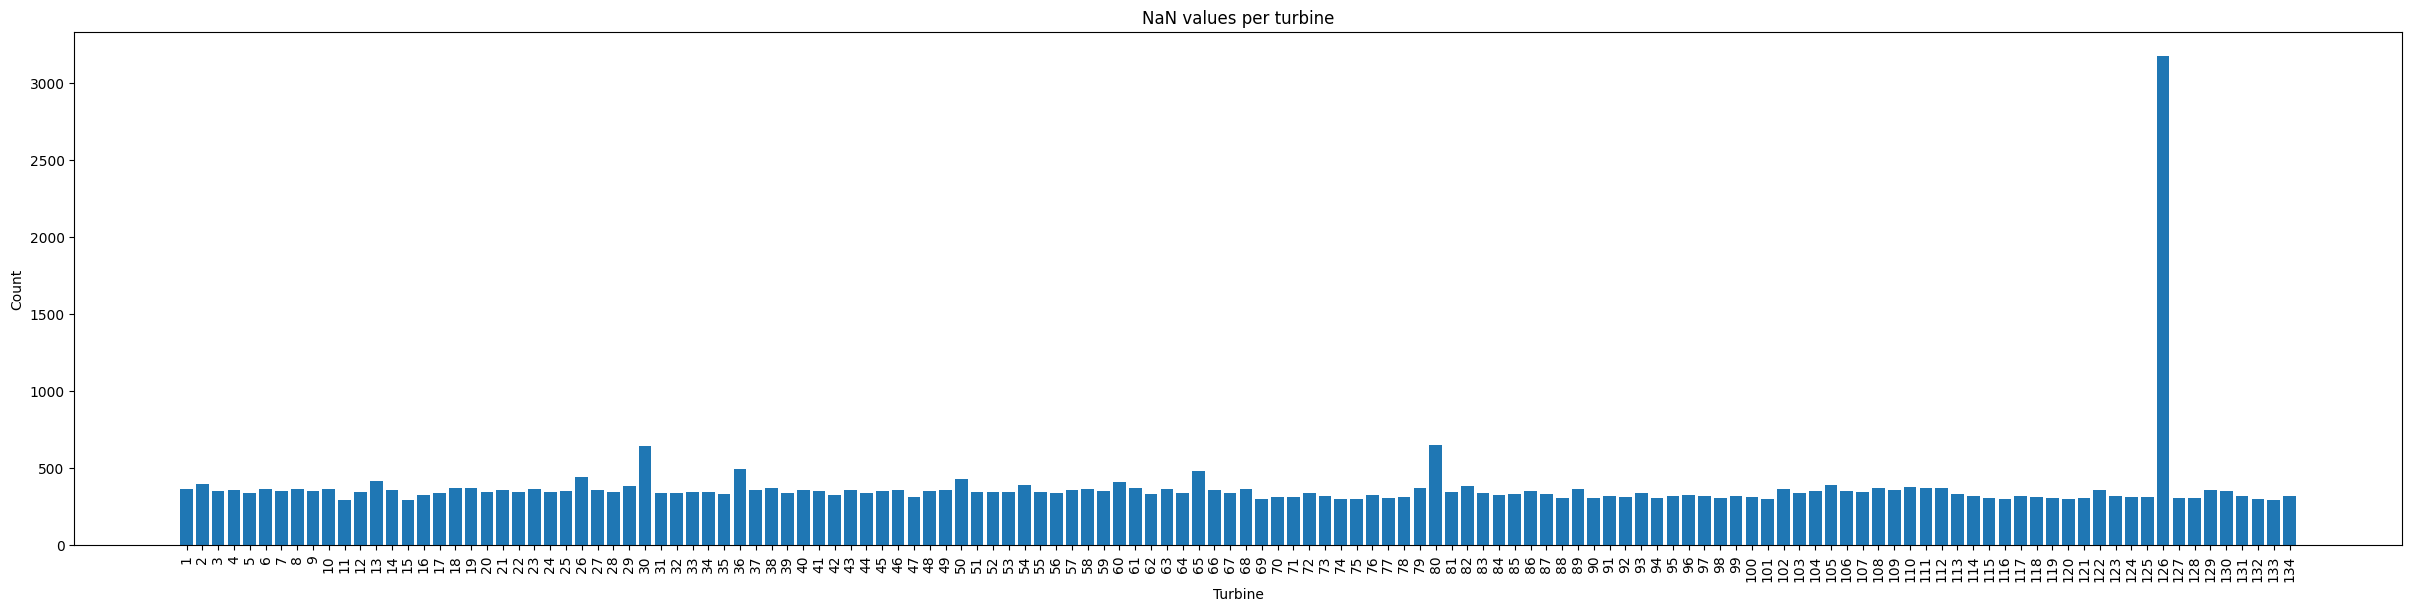

In [32]:
nan_per_turbine = {turb: data['P_norm'].isna().sum() for turb, data in data.groupby("TurbID")}

fig, ax = plt.subplots(figsize=(24,6), constrained_layout=True)
ax.bar(list(nan_per_turbine.keys()), list(nan_per_turbine.values()))
ax.set_title("NaN values per turbine")
ax.set_xlabel("Turbine")
ax.set_ylabel("Count")
ax.set_xticks(list(nan_per_turbine.keys()))
ax.set_xticklabels(list(nan_per_turbine.keys()), rotation=90)
plt.show()

Note: TurbID 126 has many missing values, remove that turbine.

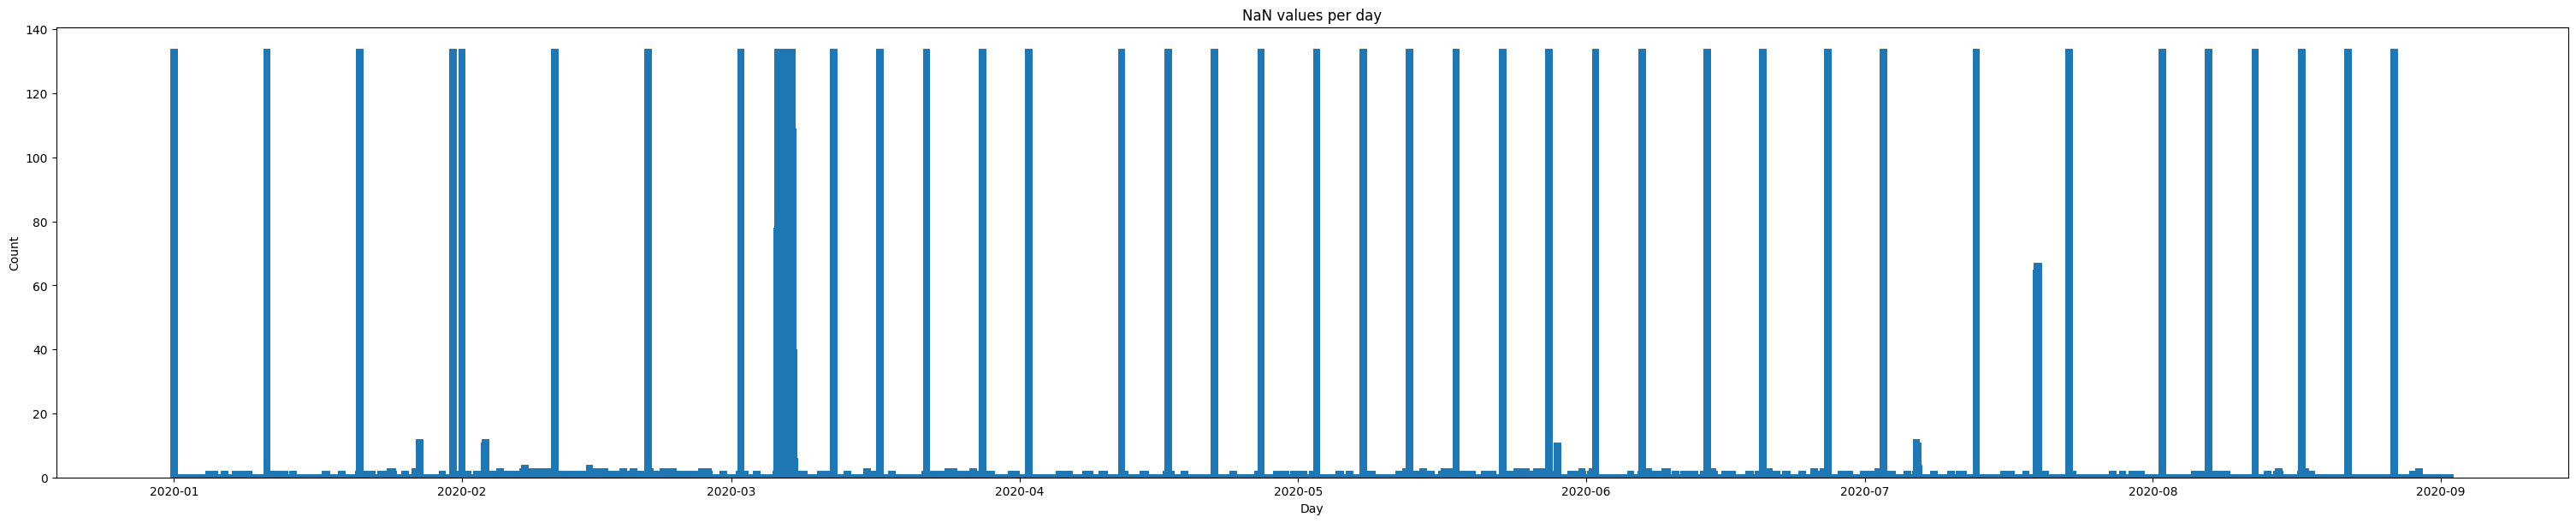

In [33]:
nan_per_day = {date: data['P_norm'].isna().sum() for date, data in data.groupby("datetime")}
fig, ax = plt.subplots(figsize=(30,6), constrained_layout=True)
ax.bar(list(nan_per_day.keys()), list(nan_per_day.values()))
ax.set_title("NaN values per day")
ax.set_xlabel("Day")
ax.set_ylabel("Count")
# ax.set_xticks(list(nan_per_day.keys()))
# ax.set_xticklabels(list(nan_per_day.keys()), rotation=90)
plt.show()

Note: some periods show spikes in missing data. Those periods should be ignored for training

In [34]:
data_no_126 = data[data['TurbID'] != 126]

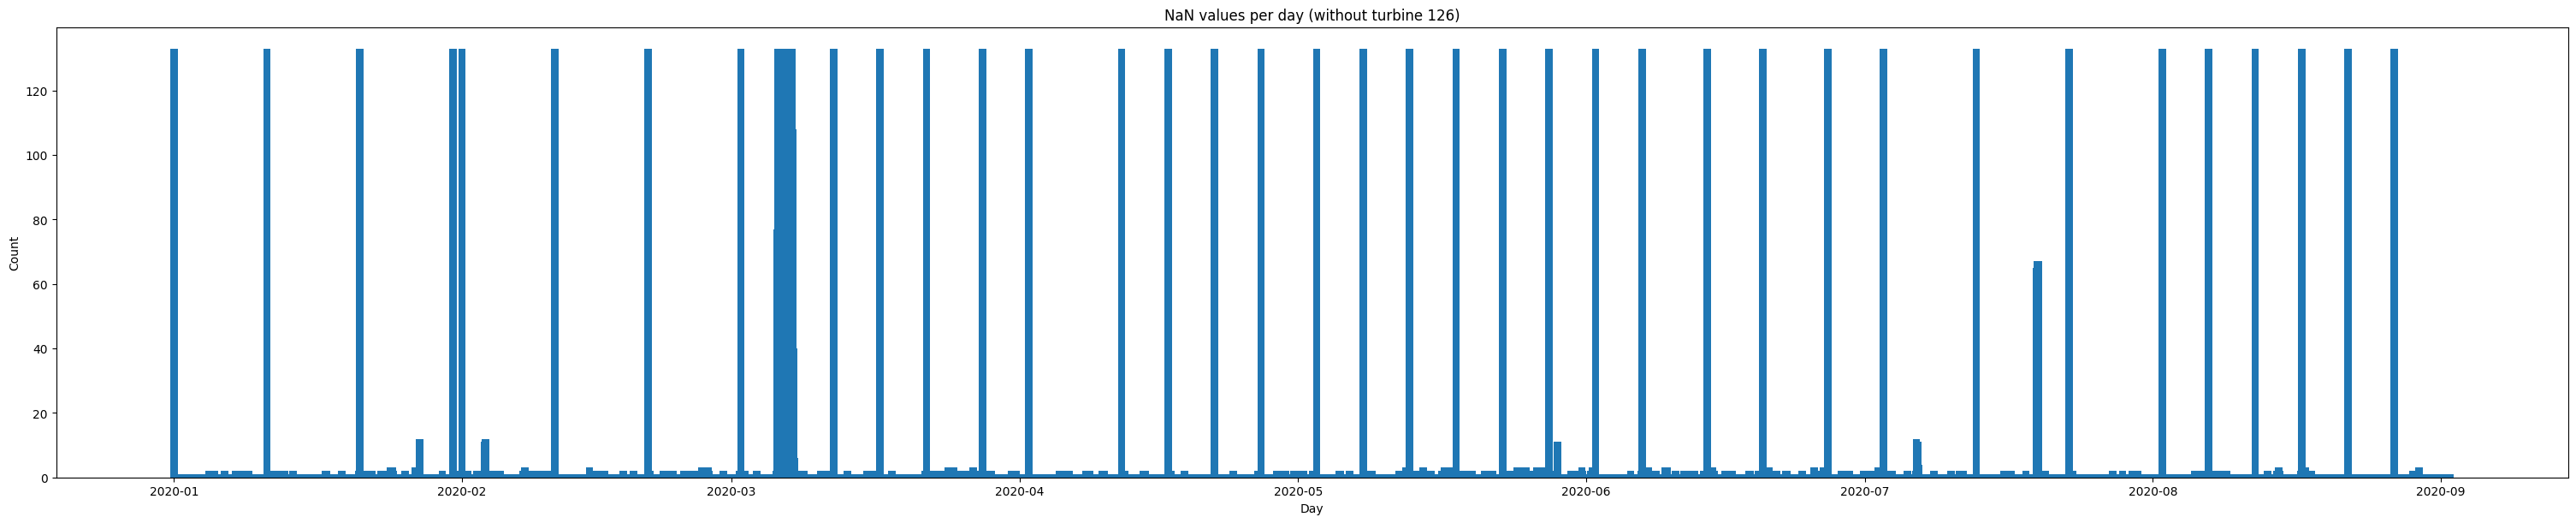

In [35]:
nan_per_day_no_126 = {date: data['P_norm'].isna().sum() for date, data in data_no_126.groupby("datetime")}
fig, ax = plt.subplots(figsize=(30,6), constrained_layout=True)
ax.bar(list(nan_per_day_no_126.keys()), list(nan_per_day_no_126.values()))
ax.set_title("NaN values per day (without turbine 126)")
ax.set_xlabel("Day")
ax.set_ylabel("Count")
plt.show()

In [36]:
for date, nans in nan_per_day.items():
    if nans > 20:
        print(f"{nans} missing on day {data[data['datetime'] == date]['Day'].unique()} time {data[data['datetime'] == date]['Tmstamp'].unique()}: {data[data['datetime'] == date]['TurbID'].value_counts()}")

134 missing on day [1] time ['00:00']: TurbID
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64
134 missing on day [11] time ['00:00']: TurbID
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64
134 missing on day [21] time ['00:00']: TurbID
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64
134 missing on day [31] time ['00:00']: TurbID
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64
134 missing on day [32] time ['00:00']: TurbID
1      1
85     1
99     1
98     1
97     1
      ..
40     1
39     1
38     1
37     1
134    1
Name: count, Length: 134, dtype: int64
134 missing on day [42] time ['00:00']: TurbID
1      1
85     1
99     1
98

In [37]:
dates_to_remove = [date for date, nans in nan_per_day.items() if nans == 134]
processed_data = data[~data['datetime'].isin(dates_to_remove)]
processed_data = processed_data[processed_data['TurbID'] != 126]
processed_data

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,datetime,P_norm
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.00,1.00,1.00,-0.25,494.66,2020-01-01 00:10:00,0.319720
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.00,1.00,1.00,-0.24,509.76,2020-01-01 00:20:00,0.329299
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.00,1.00,1.00,-0.26,542.53,2020-01-01 00:30:00,0.350087
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.00,1.00,1.00,-0.23,509.36,2020-01-01 00:40:00,0.329045
5,1,1,00:50,6.10,-1.03,30.47,41.22,20.91,1.00,1.00,1.00,-0.27,482.21,2020-01-01 00:50:00,0.311822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727515,134,245,23:10,7.79,2.80,-0.07,3.95,216.51,6.03,6.03,6.03,-111.69,601.44,2020-09-01 23:10:00,0.387458
4727516,134,245,23:20,8.06,4.39,0.23,3.94,216.51,5.81,5.81,5.81,-72.67,673.79,2020-09-01 23:20:00,0.433356
4727517,134,245,23:30,8.08,2.28,-0.16,4.15,216.51,0.68,0.68,0.68,-118.70,999.36,2020-09-01 23:30:00,0.639890
4727518,134,245,23:40,8.46,0.80,-0.14,4.32,216.51,0.02,0.02,0.02,-58.12,1100.89,2020-09-01 23:40:00,0.704298


In [38]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4657128 entries, 1 to 4727519
Data columns (total 15 columns):
 #   Column    Dtype         
---  ------    -----         
 0   TurbID    int64         
 1   Day       int64         
 2   Tmstamp   object        
 3   Wspd      float64       
 4   Wdir      float64       
 5   Etmp      float64       
 6   Itmp      float64       
 7   Ndir      float64       
 8   Pab1      float64       
 9   Pab2      float64       
 10  Pab3      float64       
 11  Prtv      float64       
 12  Patv      float64       
 13  datetime  datetime64[ns]
 14  P_norm    float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(1)
memory usage: 568.5+ MB


In [39]:
processed_data.to_csv('../data/processed_data.csv', index=False)

### Load and process processed data

In [45]:
processed_df = pd.read_csv('../data/processed_data.csv')
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657128 entries, 0 to 4657127
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   TurbID    int64  
 1   Day       int64  
 2   Tmstamp   object 
 3   Wspd      float64
 4   Wdir      float64
 5   Etmp      float64
 6   Itmp      float64
 7   Ndir      float64
 8   Pab1      float64
 9   Pab2      float64
 10  Pab3      float64
 11  Prtv      float64
 12  Patv      float64
 13  datetime  object 
 14  P_norm    float64
dtypes: float64(11), int64(2), object(2)
memory usage: 533.0+ MB


In [46]:
int_columns = processed_df.select_dtypes(include=['int64']).columns.tolist()
processed_df[int_columns] = processed_df[int_columns].apply(lambda arg: pd.to_numeric(arg, downcast='integer'))
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657128 entries, 0 to 4657127
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   TurbID    int16  
 1   Day       int16  
 2   Tmstamp   object 
 3   Wspd      float64
 4   Wdir      float64
 5   Etmp      float64
 6   Itmp      float64
 7   Ndir      float64
 8   Pab1      float64
 9   Pab2      float64
 10  Pab3      float64
 11  Prtv      float64
 12  Patv      float64
 13  datetime  object 
 14  P_norm    float64
dtypes: float64(11), int16(2), object(2)
memory usage: 479.7+ MB


In [47]:
float_columns = processed_df.select_dtypes(include=['float64']).columns.tolist()
processed_df[float_columns] = processed_df[float_columns].apply(lambda arg: pd.to_numeric(arg, downcast='float'))
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657128 entries, 0 to 4657127
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   TurbID    int16  
 1   Day       int16  
 2   Tmstamp   object 
 3   Wspd      float32
 4   Wdir      float32
 5   Etmp      float32
 6   Itmp      float32
 7   Ndir      float32
 8   Pab1      float32
 9   Pab2      float32
 10  Pab3      float32
 11  Prtv      float32
 12  Patv      float32
 13  datetime  object 
 14  P_norm    float32
dtypes: float32(11), int16(2), object(2)
memory usage: 284.2+ MB


In [50]:
processed_df['datetime'] = pd.to_datetime(processed_df['datetime']).astype('datetime64[s]')
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657128 entries, 0 to 4657127
Data columns (total 15 columns):
 #   Column    Dtype        
---  ------    -----        
 0   TurbID    int16        
 1   Day       int16        
 2   Tmstamp   object       
 3   Wspd      float32      
 4   Wdir      float32      
 5   Etmp      float32      
 6   Itmp      float32      
 7   Ndir      float32      
 8   Pab1      float32      
 9   Pab2      float32      
 10  Pab3      float32      
 11  Prtv      float32      
 12  Patv      float32      
 13  datetime  datetime64[s]
 14  P_norm    float32      
dtypes: datetime64[s](1), float32(11), int16(2), object(1)
memory usage: 284.2+ MB


In [51]:
processed_df

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv,datetime,P_norm
0,1,1,00:10,6.17,-3.99,30.730000,41.799999,25.920000,1.00,1.00,1.00,-0.250000,494.660004,2020-01-01 00:10:00,0.319720
1,1,1,00:20,6.27,-2.18,30.600000,41.630001,20.910000,1.00,1.00,1.00,-0.240000,509.760010,2020-01-01 00:20:00,0.329299
2,1,1,00:30,6.42,-0.73,30.520000,41.520000,20.910000,1.00,1.00,1.00,-0.260000,542.530029,2020-01-01 00:30:00,0.350087
3,1,1,00:40,6.25,0.89,30.490000,41.380001,20.910000,1.00,1.00,1.00,-0.230000,509.359985,2020-01-01 00:40:00,0.329045
4,1,1,00:50,6.10,-1.03,30.469999,41.220001,20.910000,1.00,1.00,1.00,-0.270000,482.209991,2020-01-01 00:50:00,0.311822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657123,134,245,23:10,7.79,2.80,-0.070000,3.950000,216.509995,6.03,6.03,6.03,-111.690002,601.440002,2020-09-01 23:10:00,0.387458
4657124,134,245,23:20,8.06,4.39,0.230000,3.940000,216.509995,5.81,5.81,5.81,-72.669998,673.789978,2020-09-01 23:20:00,0.433356
4657125,134,245,23:30,8.08,2.28,-0.160000,4.150000,216.509995,0.68,0.68,0.68,-118.699997,999.359985,2020-09-01 23:30:00,0.639890
4657126,134,245,23:40,8.46,0.80,-0.140000,4.320000,216.509995,0.02,0.02,0.02,-58.119999,1100.890015,2020-09-01 23:40:00,0.704298
